In [4]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense
from tensorflow.keras.optimizers import Optimizer

c:\users\ashok\.conda\envs\mytensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
loanfile = "C:\\workspace\\workplace\\data\\loan_data.csv"
loan = pd.read_csv(loanfile)

In [6]:
loan.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [9]:
def conv_dot_2_US(string:str):
    return string.replace(".","_")
print ([*map(conv_dot_2_US,loan.columns)])

['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid']


In [10]:
loan.columns = [*map(conv_dot_2_US,loan.columns)]

In [11]:
loan.head(2)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [13]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit_policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int_rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log_annual_inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days_with_cr_line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol_bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol_util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq_last_6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


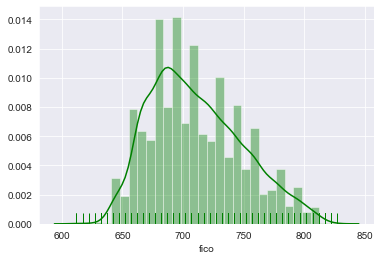

In [16]:
sns.set_style('darkgrid')
sns.distplot(loan['fico'],bins=30,rug=True,color='g')

<Figure size 720x360 with 0 Axes>

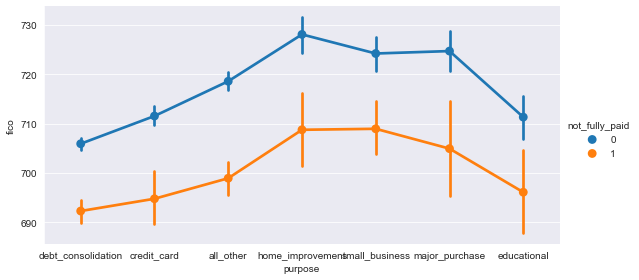

In [22]:
plt.figure(figsize=[10,5])
sns.factorplot(hue='not_fully_paid',y='fico',data=loan,x='purpose',size=4, aspect=2)

In [23]:
loan.isnull().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [25]:
purpose = pd.get_dummies(loan['purpose'])

In [28]:
loan_con=pd.concat([loan, purpose],axis=1)

In [29]:
loan_con.head(3)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0


In [30]:
loan_con.drop('purpose',axis=1,inplace=True)

In [31]:
loan_con.head(2)

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0


In [32]:
loan_con.isnull().sum()

credit_policy         0
int_rate              0
installment           0
log_annual_inc        0
dti                   0
fico                  0
days_with_cr_line     0
revol_bal             0
revol_util            0
inq_last_6mths        0
delinq_2yrs           0
pub_rec               0
not_fully_paid        0
all_other             0
credit_card           0
debt_consolidation    0
educational           0
home_improvement      0
major_purchase        0
small_business        0
dtype: int64

In [33]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler

In [40]:
X = loan_con.drop(['not_fully_paid'],axis=1).values
y = loan_con['not_fully_paid'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=50)

In [41]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
SVC_CLF = SVC()

In [43]:
SVC_CLF.fit(X_train,y_train)

c:\users\ashok\.conda\envs\mytensorflow\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
y_pred = SVC_CLF.predict(X_test)

In [47]:
print("*"*50)
print("Accuracy Score   :", accuracy_score(y_test,y_pred))
print("*"*50)
print("Confusion Matrix :\n", confusion_matrix(y_test,y_pred))
print("*"*50)
print("Classification   :", classification_report(y_test,y_pred))
print("*"*50)

**************************************************
Accuracy Score   : 0.8441196938065414
**************************************************
Confusion Matrix :
 [[2426    0]
 [ 448    0]]
**************************************************
Classification   :               precision    recall  f1-score   support

           0       0.84      1.00      0.92      2426
           1       0.00      0.00      0.00       448

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874

**************************************************


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_clf = RandomForestClassifier(400)

In [61]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
y_pred = rf_clf.predict(X_test)
print("*"*50)
print("Accuracy Score   :", accuracy_score(y_test,y_pred))
print("*"*50)
print("Confusion Matrix :\n", confusion_matrix(y_test,y_pred))
print("*"*50)
print("Classification   :", classification_report(y_test,y_pred))
print("*"*50)

**************************************************
Accuracy Score   : 0.8430758524704245
**************************************************
Confusion Matrix :
 [[2418    8]
 [ 443    5]]
**************************************************
Classification   :               precision    recall  f1-score   support

           0       0.85      1.00      0.91      2426
           1       0.38      0.01      0.02       448

    accuracy                           0.84      2874
   macro avg       0.61      0.50      0.47      2874
weighted avg       0.77      0.84      0.78      2874

**************************************************


In [91]:
for i in range(50,500,50):
    print(f"Trying model {i} estimators")
    rf_clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on  test : {rf_clf.score(X_test,y_test) * 100:.2f}%")
    print("")

Trying model 50 estimators
Model accuracy on  test : 84.34%

Trying model 100 estimators
Model accuracy on  test : 84.27%

Trying model 150 estimators
Model accuracy on  test : 84.27%

Trying model 200 estimators
Model accuracy on  test : 84.38%

Trying model 250 estimators
Model accuracy on  test : 84.38%

Trying model 300 estimators
Model accuracy on  test : 84.34%

Trying model 350 estimators
Model accuracy on  test : 84.41%

Trying model 400 estimators
Model accuracy on  test : 84.34%

Trying model 450 estimators
Model accuracy on  test : 84.31%



In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
lg_clf = LogisticRegression()
lg_clf.fit(X_train,y_train)
y_pred = lg_clf.predict(X_test)
print("*"*50)
print("Accuracy Score   :", accuracy_score(y_test,y_pred))
print("*"*50)
print("Confusion Matrix :\n", confusion_matrix(y_test,y_pred))
print("*"*50)
print("Classification   :", classification_report(y_test,y_pred))
print("*"*50)

c:\users\ashok\.conda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**************************************************
Accuracy Score   : 0.8441196938065414
**************************************************
Confusion Matrix :
 [[2415   11]
 [ 437   11]]
**************************************************
Classification   :               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2426
           1       0.50      0.02      0.05       448

    accuracy                           0.84      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.84      0.78      2874

**************************************************


In [92]:
import pickle

In [93]:
pickle.dump(lg_clf, open('logistic_regression_prediction.pkl','wb'))

In [94]:
load_lgclf_pred = pickle.load(open("logistic_regression_prediction.pkl","rb"))
load_lgclf_pred.score(X_test,y_test)

0.8441196938065414

In [97]:
load_lgclf_pred.predict([X_test[8]])

array([0], dtype=int64)

In [99]:
X_train[8]

array([1.        , 0.1202046 , 0.39475821, 0.34462419, 0.3981976 ,
       0.73809524, 0.19587484, 0.01110275, 0.22689076, 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [101]:
load_lgclf_pred.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(lg_clf,)

## Keras

In [68]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, activation = 'relu', input_dim = 19))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [69]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
classifier.fit(X_train, y_train, batch_size = 1, epochs = 100)

Train on 6704 samples
Epoch 1/100
6704/6704 [==============================] - 16s 2ms/sample - loss: 0.4471
Epoch 2/100
6704/6704 [==============================] - 15s 2ms/sample - loss: 0.4387
Epoch 3/100
6704/6704 [==============================] - 16s 2ms/sample - loss: 0.4390
Epoch 4/100
6704/6704 [==============================] - 17s 2ms/sample - loss: 0.4446
Epoch 5/100
6704/6704 [==============================] - 14s 2ms/sample - loss: 0.4453
Epoch 6/100
6704/6704 [==============================] - 14s 2ms/sample - loss: 0.4461
Epoch 7/100
6704/6704 [==============================] - 18s 3ms/sample - loss: 0.4442
Epoch 8/100
6704/6704 [==============================] - 17s 3ms/sample - loss: 0.4420
Epoch 9/100
6704/6704 [==============================] - 17s 3ms/sample - loss: 0.4449
Epoch 10/100
6704/6704 [==============================] - 16s 2ms/sample - loss: 0.4396
Epoch 11/100
6704/6704 [==============================] - 15s 2ms/sample - loss: 0.4387
Epoch 12/100
6704/6

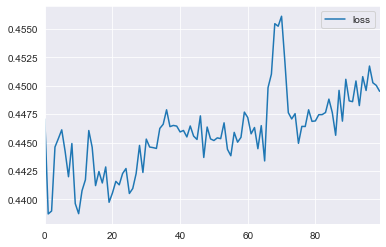

In [70]:
model_loss = pd.DataFrame(classifier.history.history)
model_loss.plot()

In [71]:

Y_pred = classifier.predict_classes(X_test)

In [73]:
print("*"*50)
print("Accuracy Score   :", accuracy_score(y_test,Y_pred))
print("*"*50)
print("Confusion Matrix :\n", confusion_matrix(y_test,Y_pred))
print("*"*50)
print("Classification   :", classification_report(y_test,Y_pred))
print("*"*50)

**************************************************
Accuracy Score   : 0.8427279053583855
**************************************************
Confusion Matrix :
 [[2422    4]
 [ 448    0]]
**************************************************
Classification   :               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2426
           1       0.00      0.00      0.00       448

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874

**************************************************


In [74]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 6704 samples, validate on 2874 samples
Epoch 1/600
6704/6704 [==============================] - 1s 221us/sample - loss: 0.4634 - val_loss: 0.4176
Epoch 2/600
6704/6704 [==============================] - 1s 108us/sample - loss: 0.4237 - val_loss: 0.4141
Epoch 3/600
6704/6704 [==============================] - 1s 98us/sample - loss: 0.4195 - val_loss: 0.4136
Epoch 4/600
6704/6704 [==============================] - 1s 95us/sample - loss: 0.4182 - val_loss: 0.4127
Epoch 5/600
6704/6704 [==============================] - 1s 111us/sample - loss: 0.4146 - val_loss: 0.4149
Epoch 6/600
6704/6704 [==============================] - 1s 108us/sample - loss: 0.4166 - val_loss: 0.4136


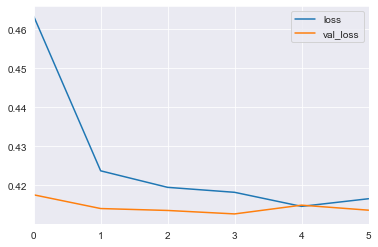

In [86]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [87]:

y_pred = model.predict_classes(X_test)
print("*"*50)
print("Accuracy Score   :", accuracy_score(y_test,y_pred))
print("*"*50)
print("Confusion Matrix :\n", confusion_matrix(y_test,y_pred))
print("*"*50)
print("Classification   :", classification_report(y_test,y_pred))
print("*"*50)

**************************************************
Accuracy Score   : 0.8441196938065414
**************************************************
Confusion Matrix :
 [[2426    0]
 [ 448    0]]
**************************************************
Classification   :               precision    recall  f1-score   support

           0       0.84      1.00      0.92      2426
           1       0.00      0.00      0.00       448

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874

**************************************************


c:\users\ashok\.conda\envs\mytensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
loan_con.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [106]:
loan.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Categorical_features = ['purpose']

In [116]:
tranformer = ColumnTransformer([('one_hot',
                                  OneHotEncoder(),
                                  Categorical_features)],
                                  remainder="passthrough")

In [119]:
Tranformer = tranformer.fit_transform(loan)

In [121]:
pd.DataFrame(Tranformer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1461,344.76,12.180755,10.39,672.0,10474.000000,215372.0,82.1,2.0,0.0,0.0,1.0
9574,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1253,257.70,11.141862,0.21,722.0,4380.000000,184.0,1.1,5.0,0.0,0.0,1.0
9575,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1071,97.81,10.596635,13.09,687.0,3450.041667,10036.0,82.9,8.0,0.0,0.0,1.0
9576,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.1600,351.58,10.819778,19.18,692.0,1800.000000,0.0,3.2,5.0,0.0,0.0,1.0


In [130]:
#missing car
import requests

In [131]:
r = requests.get('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-missing-data.csv')

In [135]:
from sklearn.datasets import load_boston

In [136]:
boston = load_boston()

In [142]:
pd.DataFrame(boston['data'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [143]:
from sklearn.model_selection import cross_val_score

In [147]:
X = loan_con.drop(['not_fully_paid'],axis=1).values
y = loan_con['not_fully_paid'].values

In [151]:
cross_val_score(lg_clf,X,y,cv=10)

c:\users\ashok\.conda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ashok\.conda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ashok\.conda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ashok\.conda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ashok\.conda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defau

array([0.83941606, 0.83941606, 0.83941606, 0.84029228, 0.84029228,
       0.84012539, 0.84117032, 0.84012539, 0.81400209, 0.82654127])

In [152]:
lg_clf.predict_proba(X_test)

array([[0.81169896, 0.18830104],
       [0.92666295, 0.07333705],
       [0.89530948, 0.10469052],
       ...,
       [0.63009971, 0.36990029],
       [0.90160219, 0.09839781],
       [0.72985765, 0.27014235]])

## Kmeans clustering

In [1]:
from mpl_toolkits.mplot3d import Axes3D

Automatically created module for IPython interactive environment


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


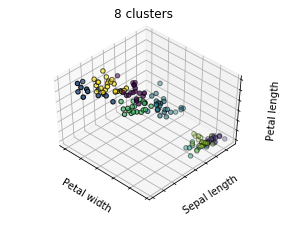

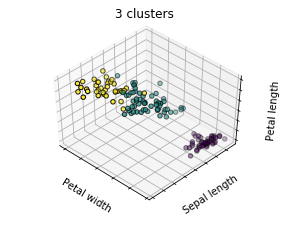

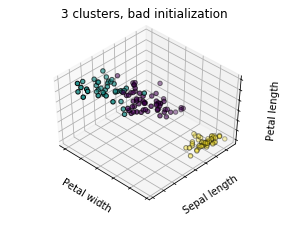

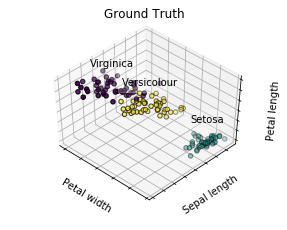

In [2]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [21]:
km = KMeans(n_clusters=3)

In [22]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
X[4]

array([5. , 3.6, 1.4, 0.2])

In [24]:
y[4]

1.0

In [25]:
km.predict([X[4]])

array([1])

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
pred = km.predict(X)

In [27]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [35]:
cancer = datasets.load_breast_cancer()

In [39]:
X = cancer.data
y = cancer.target
z = cancer.target_names

In [40]:
z

array(['malignant', 'benign'], dtype='<U9')

In [41]:
import pandas as pd

In [45]:
pd.DataFrame(X, columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [44]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [50]:
km = KMeans(n_clusters=2)

In [52]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
y[50]

1

In [54]:
km.predict([X[50]])

array([0])

In [55]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,